# download data

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from IPython.display import FileLink

In [4]:
import pandas as pd
import numpy as np

In [1]:
cd /home/paperspace/data/

/home/paperspace/data


In [6]:
#Need to first go to Kaggle website and accept rules for the competition!
#!kg download -u superexistential -p XXXXXXXXX -c state-farm-distracted-driver-detection

downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/sample_submission.csv.zip

sample_submission.csv.zip 100% |####################| Time: 0:00:00 495.8 KiB/s

downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/imgs.zip

imgs.zip 100% |#####################################| Time: 0:01:41  40.4 MiB/s

downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/driver_imgs_list.csv.zip

driver_imgs_list.csv.zip 100% |#####################| Time: 0:00:00 187.0 KiB/s



In [7]:
!mkdir ./statefarm
!mv imgs.zip ./statefarm/
!mv driver_imgs_list.csv.zip ./statefarm/
!mv sample_submission.csv.zip ./statefarm/

In [5]:
PATH='/home/paperspace/data/statefarm/'

In [6]:
%cd $PATH

/home/paperspace/data/statefarm


In [10]:
!unzip -q imgs.zip
!unzip -q driver_imgs_list.csv.zip
!rm imgs.zip
!rm driver_imgs_list.csv.zip


In [7]:
#I want to try the from-csv approach, so I'm putting all the images in the train subfolders 
#back into the train main folder
for i in range(10):
    nupath=PATH+'train/c' + str(i)
    %cd $nupath
    g=glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(len(shuf)):
        os.rename(shuf[j], PATH+'train/'+shuf[j])
        #shutil.copy(shuf[j], path+'valid/c'+str(i))


/home/paperspace/data/statefarm/train/c0
/home/paperspace/data/statefarm/train/c1
/home/paperspace/data/statefarm/train/c2
/home/paperspace/data/statefarm/train/c3
/home/paperspace/data/statefarm/train/c4
/home/paperspace/data/statefarm/train/c5
/home/paperspace/data/statefarm/train/c6
/home/paperspace/data/statefarm/train/c7
/home/paperspace/data/statefarm/train/c8
/home/paperspace/data/statefarm/train/c9


# simple Howard-style analysis w/ resnet

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np

In [8]:
sz=64
arch=resnet34
bs=30

In [9]:
PATH='/home/paperspace/data/statefarm/'

In [10]:
label_csv = f'{PATH}driver_imgs_list.csv'
tempcsv=pd.read_csv(label_csv)

In [11]:
tempcsv.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [12]:
newcsv=tempcsv[['img','classname']]
newcsv.head()

,img,classname
0,img_44733.jpg,c0
1,img_72999.jpg,c0
2,img_25094.jpg,c0
3,img_69092.jpg,c0
4,img_92629.jpg,c0


In [13]:
newcsv.to_csv(f'{PATH}short_list.csv',columns=['img','classname'],index=False)

In [14]:
label_csv = f'{PATH}short_list.csv'
n=len(list(open(label_csv)))-1 #number of images
val_idxs = get_cv_idxs(n) #get_cv_idxs(n, cv_idx=0, val_pct=0.2, seed=42)... This grabs 20% of the indices at random for validation
np.shape(val_idxs)

(4484,)

In [15]:
label_df=pd.read_csv(label_csv)

In [16]:
label_df.head()

,img,classname
0,img_44733.jpg,c0
1,img_72999.jpg,c0
2,img_25094.jpg,c0
3,img_69092.jpg,c0
4,img_92629.jpg,c0


In [17]:
label_df.pivot_table(index='classname',aggfunc=len).sort_values('img')

,img
classname,
c8,1911
c7,2002
c9,2129
c1,2267
c5,2312
c2,2317
c6,2325
c4,2326
c3,2346


In [18]:
tfms=tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}short_list.csv',test_name='test',
                                  val_idxs=val_idxs,tfms=tfms,bs=bs)

In [22]:
dir(data.test_ds)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'c',
 'denorm',
 'fnames',
 'get',
 'get_c',
 'get_n',
 'get_sz',
 'get_x',
 'get_y',
 'is_multi',
 'is_reg',
 'n',
 'path',
 'resize_imgs',
 'sz',
 'transform',
 'y']

In [29]:
np.shape(data.test_ds.y)

(79726, 1)

In [30]:
fn=PATH+data.trn_ds.fnames[0]

In [31]:
fn

'/home/paperspace/data/statefarm/train/img_0.jpg'

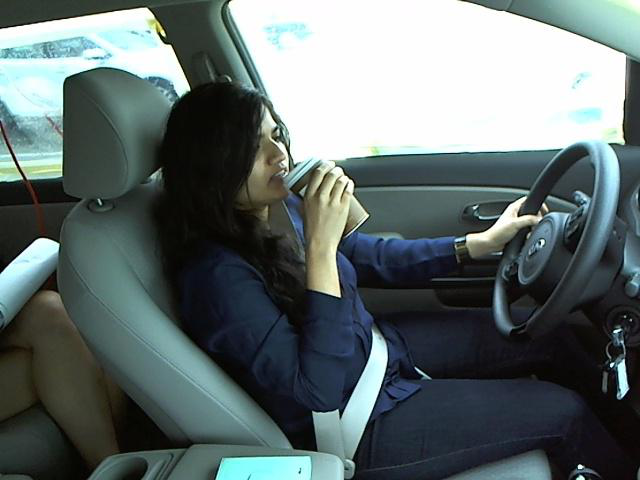

In [32]:
img=PIL.Image.open(fn);img

In [33]:
img.size

(640, 480)

In [34]:
size_d={k:PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames} #dictionary comprehension... study this!
#this maps the name of the file to the size of the file

In [15]:
row_sz,col_sz=list(zip(*size_d.values()))#zip (study this too!) turns the dictionary into the rows and columns

In [16]:
row_sz=np.array(row_sz); col_sz=np.array(col_sz)

In [64]:
row_sz[:5]

array([640, 640, 640, 640, 640])

(array([    0.,     0.,     0.,     0.,     0., 17940.,     0.,     0.,     0.,     0.]),
 array([639.5, 639.6, 639.7, 639.8, 639.9, 640. , 640.1, 640.2, 640.3, 640.4, 640.5]),
 <a list of 10 Patch objects>)

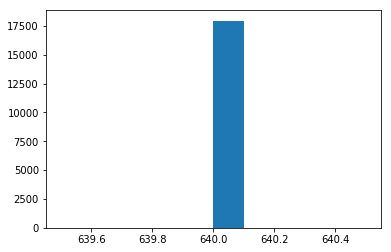

In [66]:
plt.hist(row_sz) #all the images are about the right size

(array([    0.,     0.,     0.,     0.,     0., 17940.,     0.,     0.,     0.,     0.]),
 array([479.5, 479.6, 479.7, 479.8, 479.9, 480. , 480.1, 480.2, 480.3, 480.4, 480.5]),
 <a list of 10 Patch objects>)

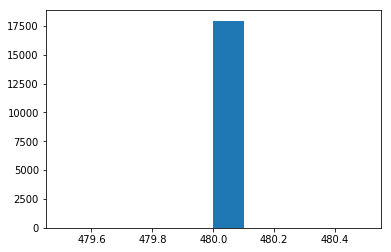

In [67]:
plt.hist(col_sz)

In [57]:
len(data.trn_ds), len(data.test_ds)

(17940, 79726)

In [58]:
len(data.classes), data.classes[:5]

(10, ['c0', 'c1', 'c2', 'c3', 'c4'])

In [35]:
def get_data(sz,bs): #passing a small image size will speed everything up very quickly!
    tfms=tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}short_list.csv',test_name='test',num_workers=4,
                                  val_idxs=val_idxs,tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [36]:
sz=64

In [37]:
data=get_data(sz,bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [38]:
np.shape(data.test_ds.fnames)

(79726,)

In [39]:
learn=ConvLearner.pretrained(arch,data,precompute=True)

100%|██████████| 2658/2658 [01:01<00:00, 43.18it/s]


In [76]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 251/310 [00:04<00:00, 61.47it/s, loss=8.65]


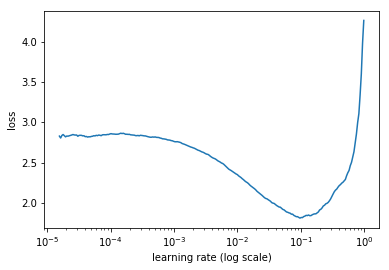

In [77]:
learn.sched.plot()

In [40]:
learn.fit(1e-2,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.845797, val_loss: 0.461301, accuracy: 0.867302
epoch:   1, train_loss: 0.664830, val_loss: 0.319970, accuracy: 0.905968
epoch:   2, train_loss: 0.509600, val_loss: 0.258504, accuracy: 0.929492
epoch:   3, train_loss: 0.460944, val_loss: 0.203425, accuracy: 0.945937
epoch:   4, train_loss: 0.418356, val_loss: 0.193689, accuracy: 0.946540



In [41]:
learn.save('128_pre')

In [42]:
dir(learn)

['TTA',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'activations',
 'bn_freeze',
 'children',
 'clip',
 'create_empty_bcolz',
 'crit',
 'data',
 'data_',
 'fc_data',
 'fit',
 'fit_gen',
 'freeze',
 'freeze_to',
 'from_model_data',
 'get_activations',
 'get_cycle_end',
 'get_layer_groups',
 'get_layer_opt',
 'get_model_path',
 'load',
 'load_cycle',
 'lr_find',
 'metrics',
 'model',
 'models',
 'models_path',
 'opt_fn',
 'precompute',
 'predict',
 'predict_array',
 'predict_dl',
 'predict_with_targs',
 'pretrained',
 'reg_fn',
 'save',
 'save_cycle',
 'save_fc1',
 'sched',
 'set_bn_freeze',
 'set_data',
 'summary',
 'tmp_path',
 'unfreeze',
 'warm_up

In [46]:
log_preds,y=learn.TTA(is_test=True)
probs=np.exp(log_preds)

In [47]:
np.shape(y)

(79726, 1)

In [48]:
#everything looks like its running fine, so lets set sz to 128
bs=20
sz=128


In [49]:
learn.set_data(get_data(sz,bs)) # set training image size to larger (299)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [30]:
#learn.precompute=False #setting to false so data augmentation works

In [50]:
learn.fit(1e-2,5,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.364508, val_loss: 0.158756, accuracy: 0.957714
epoch:   1, train_loss: 0.297392, val_loss: 0.173501, accuracy: 0.955937
epoch:   2, train_loss: 0.339476, val_loss: 0.147388, accuracy: 0.962571
epoch:   3, train_loss: 0.300698, val_loss: 0.156409, accuracy: 0.961048
epoch:   4, train_loss: 0.296625, val_loss: 0.143611, accuracy: 0.963714



In [51]:
learn.save('128_pre')

In [17]:
learn.load('128_pre')

In [21]:
?? learn

In [52]:
log_preds,y=learn.TTA(is_test=True)
probs=np.exp(log_preds)


In [53]:
df=pd.DataFrame(probs[0,:,:]) 

In [54]:
df.columns=data.classes

In [33]:
np.shape(data.test_ds.fnames)

(79726,)

In [55]:
df.insert(0, 'img', [o[5:] for o in data.test_ds.fnames]) 

In [57]:
PATH

'/home/paperspace/data/statefarm/'

In [60]:
from IPython.display import FileLink

In [68]:
%cd /home/paperspace/fastai/courses/dl1/
submission_file_name = 'statefarm_submission4.csv'
df.to_csv(submission_file_name,index=False)
FileLink(submission_file_name)

/home/paperspace/fastai/courses/dl1


/home/paperspace/fastai/courses/dl1/statefarm_submission4.csv

In [31]:
data.test_ds.fnames

['test/img_37990.jpg',
 'test/img_79092.jpg',
 'test/img_55859.jpg',
 'test/img_92870.jpg',
 'test/img_20844.jpg',
 'test/img_46378.jpg',
 'test/img_43222.jpg',
 'test/img_41999.jpg',
 'test/img_44458.jpg',
 'test/img_3738.jpg',
 'test/img_95897.jpg',
 'test/img_93761.jpg',
 'test/img_92294.jpg',
 'test/img_70963.jpg',
 'test/img_59155.jpg',
 'test/img_90544.jpg',
 'test/img_67101.jpg',
 'test/img_89867.jpg',
 'test/img_76790.jpg',
 'test/img_77318.jpg',
 'test/img_56520.jpg',
 'test/img_51008.jpg',
 'test/img_1372.jpg',
 'test/img_55364.jpg',
 'test/img_26345.jpg',
 'test/img_80702.jpg',
 'test/img_45651.jpg',
 'test/img_64322.jpg',
 'test/img_65746.jpg',
 'test/img_17468.jpg',
 'test/img_85117.jpg',
 'test/img_23098.jpg',
 'test/img_98108.jpg',
 'test/img_79914.jpg',
 'test/img_20006.jpg',
 'test/img_85875.jpg',
 'test/img_90406.jpg',
 'test/img_68451.jpg',
 'test/img_96662.jpg',
 'test/img_48122.jpg',
 'test/img_61470.jpg',
 'test/img_69285.jpg',
 'test/img_77452.jpg',
 'test/img_90

In [19]:
np.shape(probs)

(5, 4484, 10)

In [20]:
np.shape(log_preds)

(5, 4484, 10)

In [21]:
np.shape(y)

(4484,)

In [23]:
probs[:,:4,:]

array([[[0.00002, 0.00001, 0.     , 0.00001, 0.00002, 0.0001 , 0.00003, 0.     , 0.99977, 0.00002],
        [0.00017, 0.00277, 0.01096, 0.00011, 0.00016, 0.00085, 0.98474, 0.00002, 0.00001, 0.00022],
        [0.00018, 0.     , 0.00016, 0.00024, 0.00003, 0.99884, 0.00041, 0.     , 0.00003, 0.00011],
        [0.99075, 0.00008, 0.00001, 0.00186, 0.0007 , 0.00194, 0.00009, 0.00001, 0.00042, 0.00415]],

       [[0.00002, 0.00001, 0.     , 0.00001, 0.00002, 0.0001 , 0.00003, 0.     , 0.99977, 0.00002],
        [0.00017, 0.00277, 0.01096, 0.00011, 0.00016, 0.00085, 0.98474, 0.00002, 0.00001, 0.00022],
        [0.00018, 0.     , 0.00016, 0.00024, 0.00003, 0.99884, 0.00041, 0.     , 0.00003, 0.00011],
        [0.99075, 0.00008, 0.00001, 0.00186, 0.0007 , 0.00194, 0.00009, 0.00001, 0.00042, 0.00415]],

       [[0.00002, 0.00001, 0.     , 0.00001, 0.00002, 0.0001 , 0.00003, 0.     , 0.99977, 0.00002],
        [0.00017, 0.00277, 0.01096, 0.00011, 0.00016, 0.00085, 0.98474, 0.00002, 0.00001, 0.0002

In [25]:
y[:10]

array([8, 6, 5, 0, 5, 2, 6, 9, 6, 2])

In [ ]:
trn_tfms,val_tfms = tfms_from_model(arch,sz)